In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Preprocessing data

In [31]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

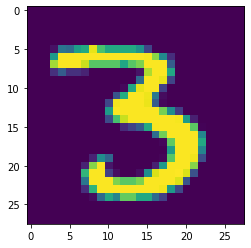

In [13]:
plt.imshow(x_train[12])

Normalize data

3


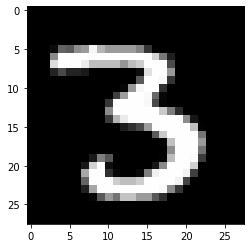

In [17]:
x_train, x_test = x_train/255., x_test/255.
plt.imshow(x_train[12],cmap='gray')
print(y_train[12])

In [22]:
x_train[0].shape

(28, 28)

### Modeling

The batch size defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. 

In [55]:
tf.random.set_seed(42)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax') #output
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=.001),
                metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 3.2078 - accuracy: 0.8674
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4393 - accuracy: 0.9083
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2834 - accuracy: 0.9324
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2182 - accuracy: 0.9437
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2031 - accuracy: 0.9468
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1754 - accuracy: 0.9533
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1777 - accuracy: 0.9551
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1664 - accuracy: 0.9579
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1518 - accuracy: 0.9607
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1481 - accuracy: 0.9633

In [56]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.evaluate(x_test,y_test,batch_size=64)

157/157 [==============================] - 0s 1ms/step - loss: 0.2304 - accuracy: 0.9547


[0.23043642938137054, 0.9546999931335449]

<AxesSubplot:>

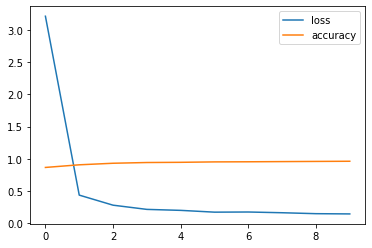

In [58]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [68]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)


In [144]:
import random
def RandomSet(test_data,y_test,y_pred):
    plt.figure(figsize=(5,5))
    for i in range(1,5):
        ax = plt.subplot(2,2,i)
        index = random.choice(range(len(test_data)))

        if y_test[index] == y_pred[index] :
            cmap = plt.cm.Blues
            color = 'blue' 
        else :
            cmap =  plt.cm.Reds
            color = 'red' 

        plt.imshow(test_data[index],cmap=cmap)
        plt.title(y_pred[index],color=color)
        plt.axis(False) # Remove Axis x and y

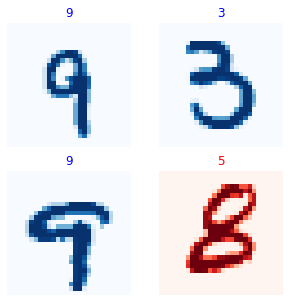

In [145]:
RandomSet(x_test,y_test,y_pred)

### Find ideal learning rate

In [164]:

tf.random.set_seed(42)
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax') #output
])

model_2.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=.0001),
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/5))

history = model_2.fit(x_train,y_train,epochs=20,batch_size=64,callbacks=[lr_scheduler])

Epoch 1/20
938/938 [==============================] - 3s 2ms/step - loss: 11.7910 - accuracy: 0.7611 - lr: 1.0000e-04
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 2.9124 - accuracy: 0.8965 - lr: 1.5849e-04
Epoch 3/20
938/938 [==============================] - 2s 3ms/step - loss: 1.6520 - accuracy: 0.9251 - lr: 2.5119e-04
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 1.0884 - accuracy: 0.9400 - lr: 3.9811e-04
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.8490 - accuracy: 0.9459 - lr: 6.3096e-04
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.6188 - accuracy: 0.9446 - lr: 0.0010
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4238 - accuracy: 0.9373 - lr: 0.0016
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3942 - accuracy: 0.9224 - lr: 0.0025
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0

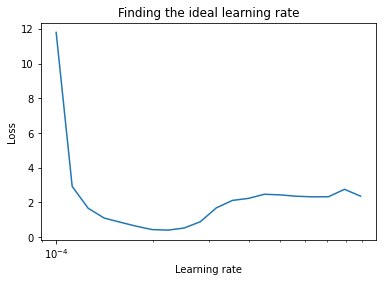

In [166]:
lrs = 1e-4 * (10**(np.arange(20)/20))
plt.semilogx(lrs, history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

ideal learning rate about 0.0001 - 0.0002

In [171]:
tf.random.set_seed(42)
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax') #output
])

model_3.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.0002),
                metrics=['accuracy'])

history = model_3.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
938/938 [==============================] - 3s 2ms/step - loss: 7.7690 - accuracy: 0.8225
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 1.9555 - accuracy: 0.9180
Epoch 3/10
938/938 [==============================] - 2s 3ms/step - loss: 1.1532 - accuracy: 0.9382
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.7672 - accuracy: 0.9505
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5364 - accuracy: 0.9604
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4077 - accuracy: 0.9665
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3248 - accuracy: 0.9705
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2527 - accuracy: 0.9746
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2008 - accuracy: 0.9785
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1684 - accuracy: 0.9811

In [173]:
model_3.evaluate(x_test,y_test,batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.8217 - accuracy: 0.9555


[0.8217073082923889, 0.9555000066757202]

In [174]:
y_prob = model_3.predict(x_test)
y_pred = y_prob.argmax(axis=1)

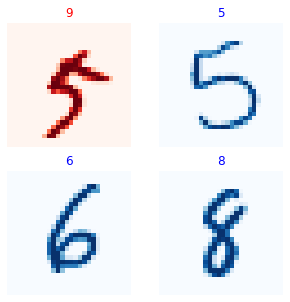

In [180]:
RandomSet(x_test,y_test,y_pred)